In [1]:
import pandas as pd
import seaborn as sbs
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
print("Which renewable energy sources have the greatest energy production vs consumption?/Based on storage efficiency vs production, what is the most efficient renewable energy?")

Which renewable energy sources have the greatest energy production vs consumption?/Based on storage efficiency vs production, what is the most efficient renewable energy?


In [3]:
# 
question_1_csv = Path("../Resources/energy_dataset_.csv")

In [4]:
question_1_df = pd.read_csv(question_1_csv)
question_1_df

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


In [5]:
question_1_df.count()

Type_of_Renewable_Energy         15000
Installed_Capacity_MW            15000
Energy_Production_MWh            15000
Energy_Consumption_MWh           15000
Energy_Storage_Capacity_MWh      15000
Storage_Efficiency_Percentage    15000
Grid_Integration_Level           15000
Initial_Investment_USD           15000
Funding_Sources                  15000
Financial_Incentives_USD         15000
GHG_Emission_Reduction_tCO2e     15000
Air_Pollution_Reduction_Index    15000
Jobs_Created                     15000
dtype: int64

In [6]:
mask_under_70 = (question_1_df['Storage_Efficiency_Percentage'] <= 70)
under_70_question = question_1_df.loc[mask_under_70].reset_index()

under_70_question.count()

index                            5860
Type_of_Renewable_Energy         5860
Installed_Capacity_MW            5860
Energy_Production_MWh            5860
Energy_Consumption_MWh           5860
Energy_Storage_Capacity_MWh      5860
Storage_Efficiency_Percentage    5860
Grid_Integration_Level           5860
Initial_Investment_USD           5860
Funding_Sources                  5860
Financial_Incentives_USD         5860
GHG_Emission_Reduction_tCO2e     5860
Air_Pollution_Reduction_Index    5860
Jobs_Created                     5860
dtype: int64

In [7]:
mask_over_85 = (question_1_df['Storage_Efficiency_Percentage'] >= 85)
over_85_question = question_1_df.loc[mask_over_85].reset_index()

over_85_question.count()

index                            4599
Type_of_Renewable_Energy         4599
Installed_Capacity_MW            4599
Energy_Production_MWh            4599
Energy_Consumption_MWh           4599
Energy_Storage_Capacity_MWh      4599
Storage_Efficiency_Percentage    4599
Grid_Integration_Level           4599
Initial_Investment_USD           4599
Funding_Sources                  4599
Financial_Incentives_USD         4599
GHG_Emission_Reduction_tCO2e     4599
Air_Pollution_Reduction_Index    4599
Jobs_Created                     4599
dtype: int64

In [8]:
mask_over_95 = (question_1_df['Storage_Efficiency_Percentage'] >= 95)
over_95_question = question_1_df.loc[mask_over_95].reset_index()

over_95_question.count()

index                            1551
Type_of_Renewable_Energy         1551
Installed_Capacity_MW            1551
Energy_Production_MWh            1551
Energy_Consumption_MWh           1551
Energy_Storage_Capacity_MWh      1551
Storage_Efficiency_Percentage    1551
Grid_Integration_Level           1551
Initial_Investment_USD           1551
Funding_Sources                  1551
Financial_Incentives_USD         1551
GHG_Emission_Reduction_tCO2e     1551
Air_Pollution_Reduction_Index    1551
Jobs_Created                     1551
dtype: int64

In [9]:
over_95_question['Type_of_Renewable_Energy'].value_counts()

Type_of_Renewable_Energy
2    243
1    227
7    225
6    219
5    216
4    215
3    206
Name: count, dtype: int64

In [10]:
mask_over_98 = (question_1_df['Storage_Efficiency_Percentage'] >= 98)
over_98_question = question_1_df.loc[mask_over_98].reset_index()

over_98_question.count()

index                            666
Type_of_Renewable_Energy         666
Installed_Capacity_MW            666
Energy_Production_MWh            666
Energy_Consumption_MWh           666
Energy_Storage_Capacity_MWh      666
Storage_Efficiency_Percentage    666
Grid_Integration_Level           666
Initial_Investment_USD           666
Funding_Sources                  666
Financial_Incentives_USD         666
GHG_Emission_Reduction_tCO2e     666
Air_Pollution_Reduction_Index    666
Jobs_Created                     666
dtype: int64

In [11]:
government_mask = (over_98_question['Funding_Sources'] != 2 )
government_df = over_98_question.loc[government_mask].reset_index()

print(government_df.count())
government_df['Type_of_Renewable_Energy'].value_counts()

level_0                          461
index                            461
Type_of_Renewable_Energy         461
Installed_Capacity_MW            461
Energy_Production_MWh            461
Energy_Consumption_MWh           461
Energy_Storage_Capacity_MWh      461
Storage_Efficiency_Percentage    461
Grid_Integration_Level           461
Initial_Investment_USD           461
Funding_Sources                  461
Financial_Incentives_USD         461
GHG_Emission_Reduction_tCO2e     461
Air_Pollution_Reduction_Index    461
Jobs_Created                     461
dtype: int64


Type_of_Renewable_Energy
5    81
2    75
7    72
3    63
1    59
6    57
4    54
Name: count, dtype: int64

In [12]:
over_98_question['Type_of_Renewable_Energy'].value_counts()

Type_of_Renewable_Energy
2    111
5    104
7     95
4     93
1     91
3     88
6     84
Name: count, dtype: int64

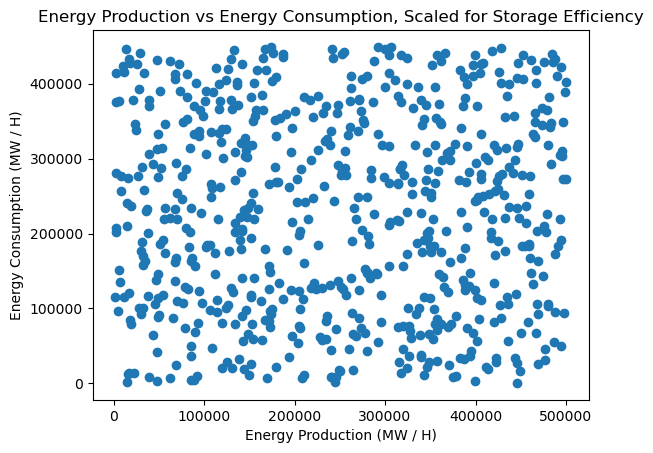

In [13]:
x_values = over_98_question['Energy_Production_MWh']
y_values = over_98_question['Energy_Consumption_MWh']


# sizes = question_1_df['Storage_Efficiency_Percentage']
color_map ={
    '1':'Green',
    '2': 'Red',
    '3': 'Purple',
    '4': 'Yellow',
    '5': 'Brown',
    '6': 'Gray',
    '7': "Orange"
}
# color = over_98_question['Type_of_Renewable_Energy'].map(color_map)

plt.scatter(x_values,y_values)
# ,c=color
# , s=sizes
plt.xlabel('Energy Production (MW / H)')
plt.ylabel('Energy Consumption (MW / H)')
plt.title("Energy Production vs Energy Consumption, Scaled for Storage Efficiency")
plt.show()

In [14]:
# x_values = government_df['Energy_Production_MWh']
# y_values = government_df['Energy_Consumption_MWh']


# # sizes = question_1_df['Storage_Efficiency_Percentage']
# color_map ={
#     '1':'Green',
#     '2': 'Red',
#     '3': 'Purple',
#     '4': 'Yellow',
#     '5': 'Brown',
#     '6': 'Gray',
#     '7': "Orange"
# }
# # color = over_98_question['Type_of_Renewable_Energy'].map(color_map)

# plt.scatter(x_values,y_values, c=color_map)
# # ,c=color
# # , s=sizes
# plt.xlabel('Energy Production (MW / H)')
# plt.ylabel('Energy Consumption (MW / H)')
# plt.title("Energy Production vs Energy Consumption, Scaled for Storage Efficiency")
# plt.show()

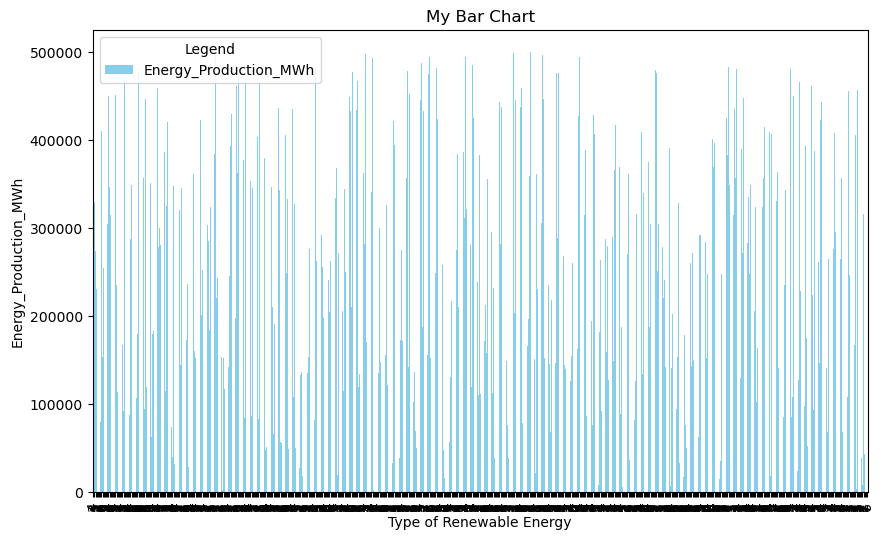

In [15]:
over_98_question.plot(x='Type_of_Renewable_Energy', y='Energy_Production_MWh', kind='bar', color='skyblue', figsize=(10, 6))
plt.title('My Bar Chart')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Energy_Production_MWh')
plt.legend(title='Legend')
plt.show()

In [16]:
energy_production_sum = question_1_df.groupby('Type_of_Renewable_Energy')['Energy_Production_MWh'].sum()
print(energy_production_sum)

Type_of_Renewable_Energy
1    5.483529e+08
2    5.513473e+08
3    5.415588e+08
4    5.323415e+08
5    5.430888e+08
6    5.399439e+08
7    5.286312e+08
Name: Energy_Production_MWh, dtype: float64


In [17]:
energy_consumption_sum = question_1_df.groupby('Type_of_Renewable_Energy')['Energy_Consumption_MWh'].sum()
print(energy_consumption_sum)

Type_of_Renewable_Energy
1    4.951870e+08
2    5.035184e+08
3    4.782319e+08
4    4.743624e+08
5    4.774828e+08
6    4.826789e+08
7    4.782665e+08
Name: Energy_Consumption_MWh, dtype: float64


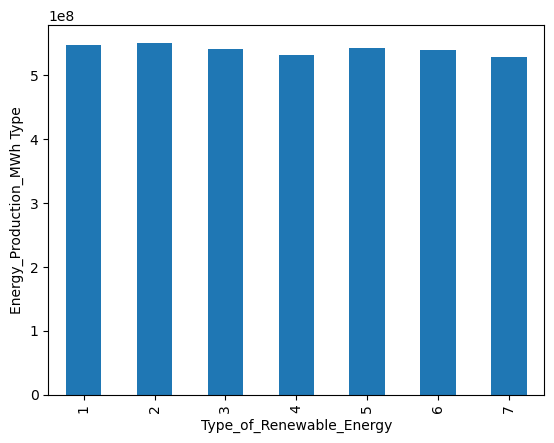

In [18]:
energy_production_sum.plot(kind='bar')

plt.xlabel('Type_of_Renewable_Energy')
plt.ylabel('Energy_Production_MWh Type')
plt.show()

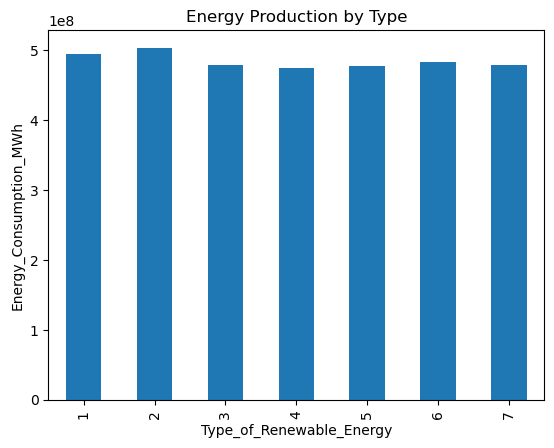

In [19]:
energy_consumption_sum.plot(kind='bar')

plt.xlabel('Type_of_Renewable_Energy')
plt.ylabel('Energy_Consumption_MWh')
plt.title('Energy Production by Type')
plt.show()

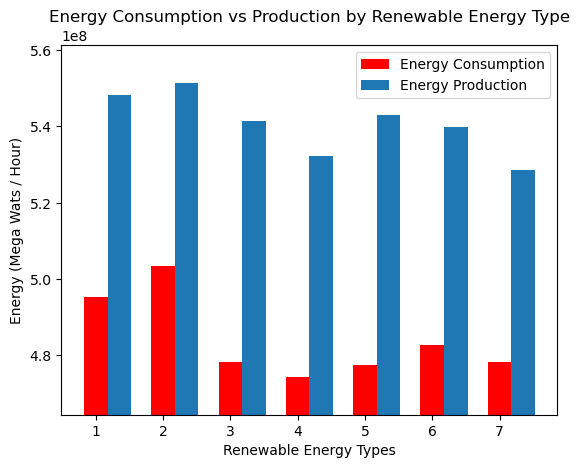

In [20]:
# Set the width of the bars
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots()
max_y = energy_production_sum.max() + 10000000
min_y = energy_consumption_sum.min() - 10000000
plt.ylim(min_y, max_y)

# Plot the bars for Energy Consumption
bars1 = ax.bar(range(len(energy_consumption_sum)), energy_consumption_sum , bar_width, label='Energy Consumption', color = 'red')



# Plot the bars for Energy Production
bars2 = ax.bar([x + bar_width for x in range(len(energy_production_sum))], energy_production_sum, bar_width, label='Energy Production')



# Add some text for labels, title and axes ticks
ax.set_xlabel('Renewable Energy Types')
ax.set_ylabel('Energy (Mega Wats / Hour)')
ax.set_title('Energy Consumption vs Production by Renewable Energy Type')
ax.set_xticks(range(len(energy_consumption_sum)))
ax.set_xticklabels(energy_consumption_sum.index)
ax.legend()

# Show the plot
plt.show()

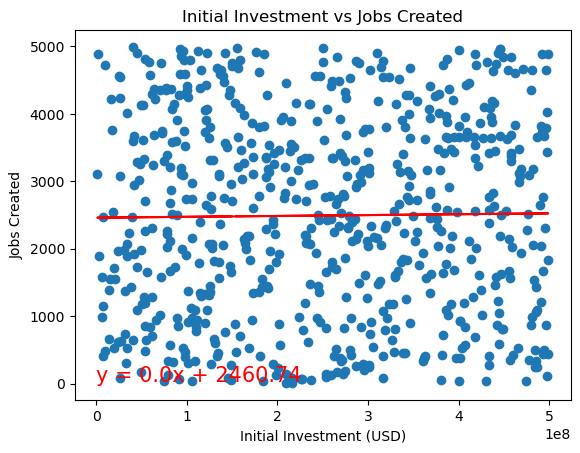

In [21]:
x_values = over_98_question['Initial_Investment_USD']
y_values = over_98_question['Jobs_Created']
# sizes = question_1_df['Storage_Efficiency_Percentage']
colors = over_98_question['Type_of_Renewable_Energy'].map({"1": 'Green', "2": 'Spanish orange', "3": 'Indigo Dye', "4": 'Carmine', "5": 'Dark spring green', "6": 'Lavender (floral)', "7": "Seal brown"})
plt.scatter(x_values,y_values)
# , s=sizes
plt.xlabel('Initial Investment (USD)')
plt.ylabel('Jobs Created')
plt.title("Initial Investment vs Jobs Created")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.show()